<a href="https://colab.research.google.com/github/HamzaAnjum15/Statsbomb/blob/main/Heatmap%26playing11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplsoccer statsbombpy
from mplsoccer import Sbopen, Pitch, VerticalPitch
import statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.4 MB/s eta 0:00:00


In [ ]:
# Defining the match ID for which events will be analyzed
match_id = 3869685

# Initializing the parser object to read event data from StatsBomb
parser = Sbopen()

# Retrieving the event data for the specified match ID
events, related, freeze, tactics = parser.event(match_id) # Fetching the first dataframe which contains all the events for the match

# Focusing only on passes for this analysis
# Creating a mask to filter passes made by Argentina
mask = (events.type_name == 'Pass') & (events.team_name == "Argentina")

# Applying the mask to filter relevant columns: start and end positions, player info, and pass details
df_ar = events.loc[mask, ["x", 'y', 'end_x', 'end_y', 'player_name', "id", "type_name", "outcome_name", "minute", 'second', "under_pressure"]]

# Filtering passes made by France for comparison or analysis
# Creating a mask to filter passes made by France
mask_fr = (events.type_name == 'Pass') & (events.team_name == "France")

# Applying the mask to extract relevant columns for French passes
df_fr = events.loc[mask_fr, ["x", 'y', 'end_x', 'end_y', 'player_name', "id", "type_name", "outcome_name", "minute", 'second', "under_pressure"]]

In [ ]:
starting_xi_event = events.loc[((events['type_name'] == 'Starting XI') &
                               (events['team_name'] == 'Argentina')), ['id', 'tactics_formation']]

In [ ]:
starting_xi = tactics.merge(starting_xi_event, on='id')


In [ ]:
events = events.loc[((events['type_name'] == 'Ball Receipt') &
                   (events['outcome_name'].isnull()) &
                   (events['player_id'].isin(starting_xi['player_id']))
                   ), ['player_id', 'x', 'y']]
# merge on the starting positions to the events
events = events.merge(starting_xi, on='player_id')
formation = events['tactics_formation'].iloc[0]

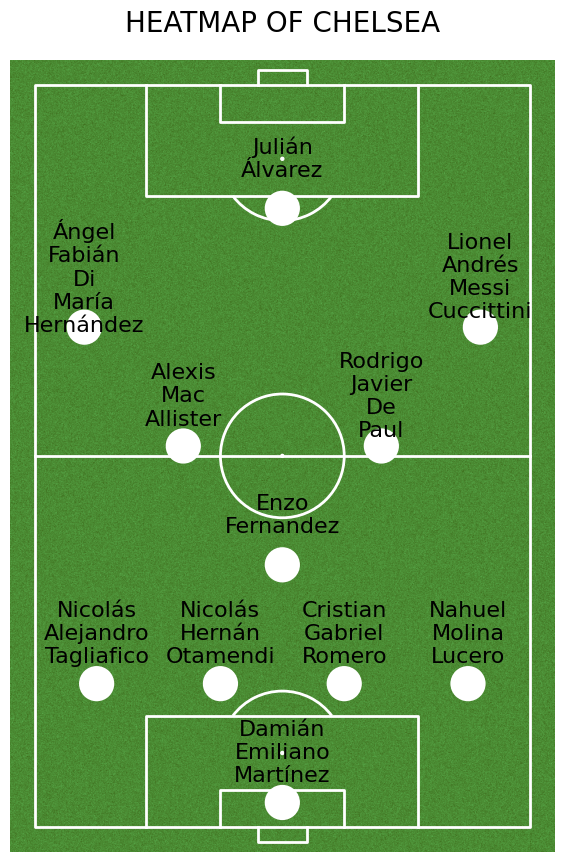

In [ ]:
import math
from urllib.request import urlopen

import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

from mplsoccer import VerticalPitch, Sbopen, FontManager, inset_image
pitch = VerticalPitch(goal_type='box',pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(6, 8.72))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text',
                          text=starting_xi.player_name.str.replace(' ', '\n'),
                          va='center', ha='center', fontsize=16, ax=ax)
# scatter markers
mpl.rcParams['hatch.linewidth'] = 3
mpl.rcParams['hatch.color'] = 'white'
ax.set_title('HEATMAP OF CHELSEA', fontsize=20, color='black', pad=20)

ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             c='white', hatch='||', linewidth=3, s=500,
                             # you can also provide a single offset instead of a list
                             # for xoffset and yoffset
                             xoffset=-8,
                             ax=ax)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [ ]:
from google.colab import files
files.download('plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install cmasher
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr

from mplsoccer import VerticalPitch, Sbopen
from mplsoccer.utils import FontManager

# get data
parser = Sbopen()
match_files = [19789, 19794, 19805]
df = pd.concat([parser.event(file)[0] for file in match_files])  # 0 index is the event file

# filter chelsea pressure events
mask_chelsea_pressure = (df.team_name == 'Chelsea FCW') & (df.type_name == 'Pressure')
df = df.loc[mask_chelsea_pressure, ['x', 'y']]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.3/533.3 kB 8.0 MB/s eta 0:00:00


In [ ]:
# pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
#                                                        ['#15242e', '#4393c4'], N=10)
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#00FF00'], N=10)


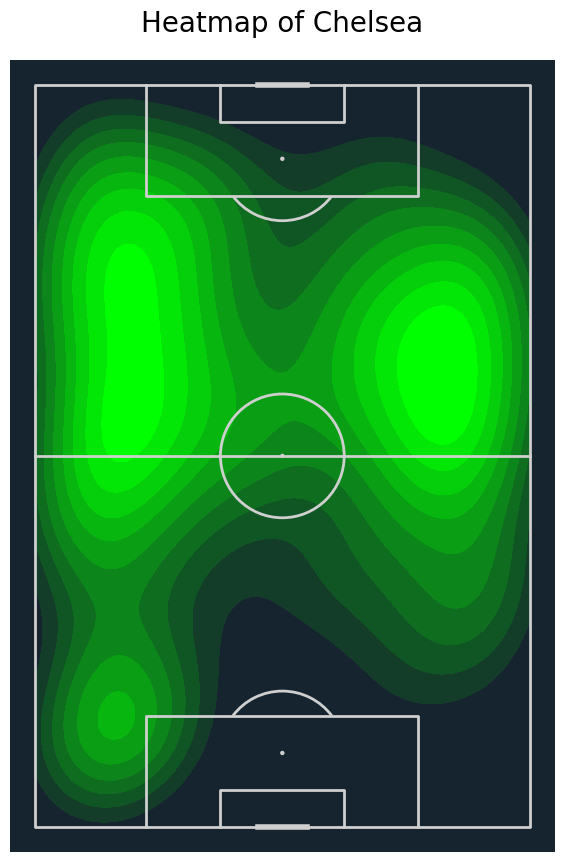

In [ ]:
pitch = VerticalPitch(line_color='#cfcfcf', line_zorder=2, pitch_color='#15242e') # #15242e
fig, ax = pitch.draw(figsize=(6, 8.72))
# note use the colormap with 100 colors for a smoother finish
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_cmap_007.png'
ax.set_title('Heatmap of Chelsea', fontsize=20, color='black', pad=20)

kdeplot = pitch.kdeplot(df.x, df.y, ax=ax, cmap=pearl_earring_cmap, fill=True, levels=100)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [ ]:
from google.colab import files
files.download('plot.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'Axes' object has no attribute 'show'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr

from mplsoccer import VerticalPitch, Sbopen
from mplsoccer.utils import FontManager
match_id = 3869685
# get data
parser = Sbopen()
match_files = [19789, 19794, 19805]
df = parser.event(match_id)[0]  # 0 index is the event file

# filter chelsea pressure events
mask_chelsea_pressure = (df.team_name == 'Argentina') & (df.type_name == 'Pressure')
df = df.loc[mask_chelsea_pressure, ['x', 'y']]

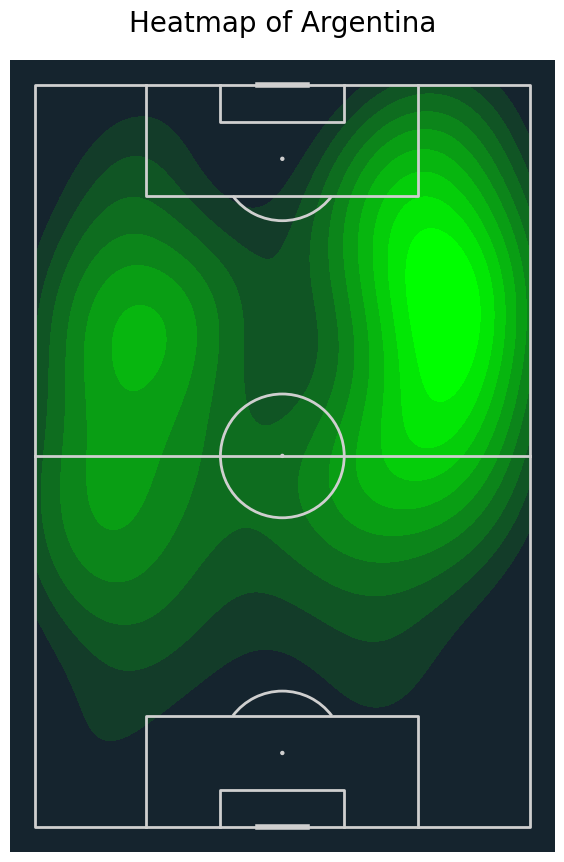

In [ ]:
pitch = VerticalPitch(line_color='#cfcfcf', line_zorder=2, pitch_color='#15242e') # #15242e
fig, ax = pitch.draw(figsize=(6, 8.72))
# note use the colormap with 100 colors for a smoother finish
# sphinx_gallery_thumbnail_path = 'gallery/pitch_plots/images/sphx_glr_plot_cmap_007.png'
ax.set_title('Heatmap of Argentina', fontsize=20, color='black', pad=20)

kdeplot = pitch.kdeplot(df.x, df.y, ax=ax, cmap=pearl_earring_cmap, fill=True, levels=100)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
ax.invert_yaxis()
# Show the plot (optional)
plt.show()